# ***Engr.Muhammad Javed***

## **K-Nearest Neighbours:**

## *Importing Required Libraries*


In [24]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , StandardScaler , FunctionTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions


## *Loading the Dataset*


In [2]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\Social_Network_Ads.csv")

## *Show Dataset*


In [3]:
Dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
Dataset.drop(["User ID" , "Gender"] ,axis = 1 , inplace = True)

## *Viewing Statistical Summary of the Dataset*


In [5]:
Dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## *Checking Dataset Information*


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## *Checking for Missing Values in the Dataset*


In [7]:
Dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## *Splitting Features and target Variable*


In [ ]:
X = Dataset[["Age" , "EstimatedSalary"]]
y = Dataset["Purchased"]


## *Visualizing Age vs Estimated Salary Scatter Plot*


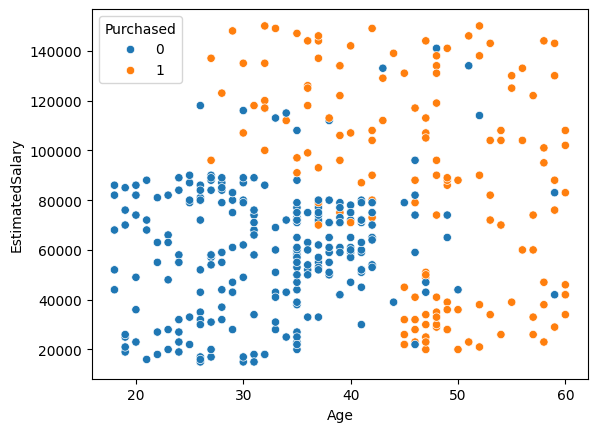

In [9]:
sn.scatterplot(x = "Age" , y = "EstimatedSalary" , data=Dataset , hue = "Purchased")
plt.show()

## *Standardizing Feature Data*


In [13]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns=x.columns)


In [14]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


## *Splitting Dataset into Training and Testing Sets*


In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(x , y , random_state=42 , test_size=0.2)


## *Training the K-Nearest Neighbors (KNN) Classifier*


In [17]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train , Y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
knn.score(X_test , Y_test)*100

92.5

## *Calculating KNN Model Accuracy*


In [20]:
print(knn.score(X_train , Y_train)*100)
print(knn.score(X_test , Y_test)*100)

90.9375
92.5


## *Finding Optimal K for KNN*


In [22]:
for i in range (1, 30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train , Y_train)
    print(i , knn1.score(X_train , Y_train)*100 , knn1.score(X_test , Y_test)*100)

1 99.6875 85.0
2 91.5625 86.25
3 92.5 91.25
4 91.875 92.5
5 90.9375 92.5
6 90.9375 90.0
7 91.875 93.75
8 90.625 92.5
9 91.25 93.75
10 90.625 92.5
11 90.9375 92.5
12 91.25 92.5
13 91.5625 92.5
14 90.625 92.5
15 90.625 92.5
16 90.0 92.5
17 90.625 92.5
18 90.0 92.5
19 90.9375 92.5
20 90.0 93.75
21 90.3125 92.5
22 90.0 93.75
23 90.3125 93.75
24 89.375 93.75
25 90.0 93.75
26 89.375 93.75
27 89.375 92.5
28 88.75 93.75
29 88.75 93.75


## *Visualizing KNN Decision Boundaries*


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


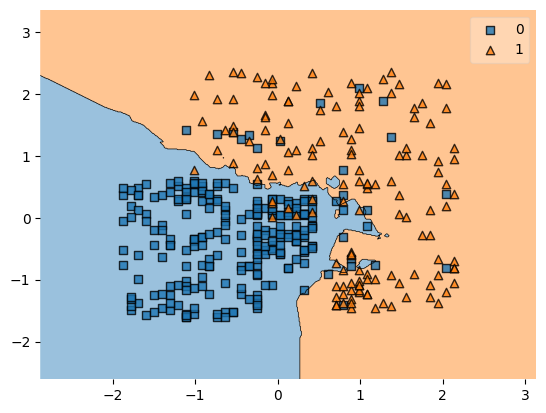

In [26]:
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = knn)
plt.show()
